# Household energy consumption
**Original dataset**: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set <br>
**Description of variables**: https://www.kaggle.com/datasets/thedevastator/240000-household-electricity-consumption-records

In [2]:
import pandas as pd 
import numpy as np

In [3]:
path_data = r"C:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\data\household\household_power_consumption.txt"
data = pd.read_csv(path_data, sep=";")

C:\Users\LaurèneDAVID\AppData\Local\Temp\ipykernel_34948\3653734809.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_data, sep=";")


In [4]:
for col in data.columns[2:]:
    data[col] = data[col].apply(lambda x: np.nan if x=="?" else x)
    data[col] = data[col].astype(float)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [6]:
data_clean = data.drop(columns=["Time"]).groupby("Date").mean().reset_index()

In [7]:
data_clean["Date"] = pd.to_datetime(data_clean["Date"], format="%d/%m/%Y")

In [8]:
data_clean.tail()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1437,2010-08-09,0.371572,0.119092,241.069264,1.638472,0.000000,0.357639,2.806944
1438,2007-09-09,1.166321,0.145244,238.922146,5.054028,1.516667,3.081944,6.411806
1439,2008-09-09,0.805315,0.125465,239.781667,3.464444,0.163889,0.314583,5.366667
1440,2009-09-09,1.056489,0.155258,241.308507,4.491250,0.669444,2.661111,7.410417
1441,2010-09-09,0.860218,0.116635,240.603215,3.701667,1.259028,1.477778,4.872222


In [9]:
for col in data_clean.columns[1:]:
    data_clean[col] = data_clean[col].round(2)

In [10]:
data_clean["Date"] = pd.to_datetime(data_clean["Date"])

In [11]:
data_clean.sort_values(by=["Date"], inplace=True)
data_clean.drop(columns=["Global_reactive_power","Voltage"], inplace=True)

In [12]:
path_clean_data = r"C:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\data\household\household_power_consumption_clean.csv"
data_clean.to_csv(path_clean_data, index=False)

In [13]:
data_clean

,Date,Global_active_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
341,2006-12-16,3.05,13.08,0.00,1.38,12.44
389,2006-12-17,2.35,10.00,1.41,2.91,9.26
437,2006-12-18,1.53,6.42,0.74,1.82,9.73
485,2006-12-19,1.16,4.93,0.58,5.28,4.30
580,2006-12-20,1.55,6.47,0.00,1.84,9.77
...,...,...,...,...,...,...
675,2010-11-22,1.42,6.01,3.37,1.47,7.04
723,2010-11-23,1.10,4.67,1.30,0.32,5.29
771,2010-11-24,1.25,5.25,0.76,1.98,8.49
819,2010-11-25,0.99,4.17,0.75,0.30,3.52


In [14]:
from prophet import Prophet

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_clean.rename({"Date":"ds", "Global_active_power":"y"},axis=1, inplace=True)
data_clean.dropna(inplace=True)

In [17]:
data_clean.iloc[int(len(data_clean)/2)]

ds                  2008-12-02 00:00:00
y                                  1.25
Global_intensity                   5.22
Sub_metering_1                      0.0
Sub_metering_2                     0.21
Sub_metering_3                     7.88
Name: 534, dtype: object

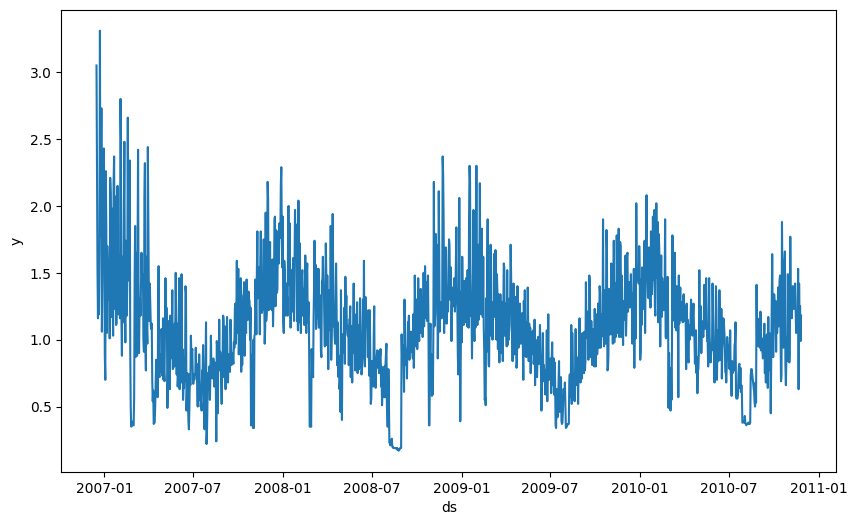

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean, x="ds", y="y")
plt.show()

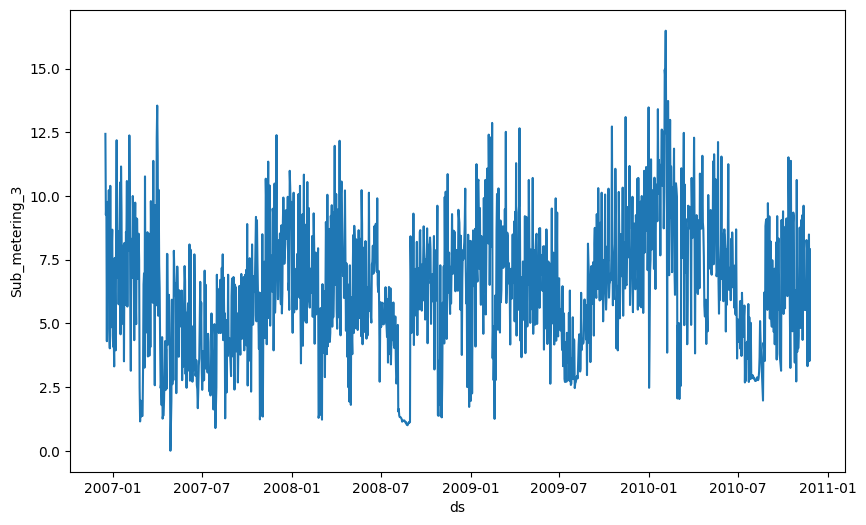

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean, x="ds", y="Sub_metering_3")
plt.show()

In [20]:
cutoff_date = '2010-01-01'

train = data_clean[data_clean["ds"] <= cutoff_date]
test = data_clean[data_clean["ds"] > cutoff_date]

m = Prophet(daily_seasonality=False)
# for col in ["Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
#     m.add_regressor(col)

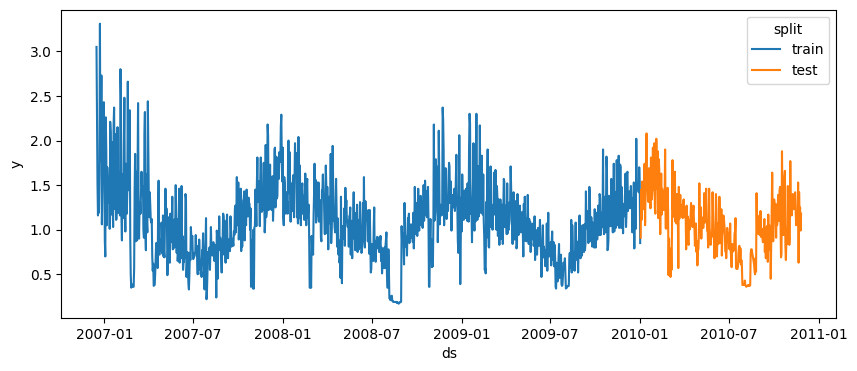

In [21]:
train_plot = train.copy()
train_plot["split"] = ["train"]*len(train_plot)

test_plot = test.copy()
test_plot["split"] = ["test"]*len(test_plot)

data_clean_plot = pd.concat([train_plot, test_plot])

plt.figure(figsize=(10,4))
sns.lineplot(data=data_clean_plot, x="ds", y="y", hue="split")
plt.show()

In [22]:
m.fit(train)

12:14:32 - cmdstanpy - INFO - Chain [1] start processing
12:14:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast = m.predict(test)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-02,1.054113,1.232721,2.001449,1.054113,1.054113,0.566558,0.566558,0.566558,0.177569,0.177569,0.177569,0.388989,0.388989,0.388989,0.0,0.0,0.0,1.620671
1,2010-01-03,1.054058,1.197418,1.972052,1.054058,1.054058,0.530384,0.530384,0.530384,0.151966,0.151966,0.151966,0.378418,0.378418,0.378418,0.0,0.0,0.0,1.584441
2,2010-01-04,1.054003,0.918213,1.707832,1.054003,1.054003,0.254706,0.254706,0.254706,-0.112460,-0.112460,-0.112460,0.367166,0.367166,0.367166,0.0,0.0,0.0,1.308709
3,2010-01-05,1.053948,0.997681,1.754245,1.053948,1.053948,0.335588,0.335588,0.335588,-0.019965,-0.019965,-0.019965,0.355553,0.355553,0.355553,0.0,0.0,0.0,1.389536
4,2010-01-06,1.053893,0.996697,1.782501,1.053893,1.053893,0.326493,0.326493,0.326493,-0.017420,-0.017420,-0.017420,0.343914,0.343914,0.343914,0.0,0.0,0.0,1.380387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2010-11-22,1.036329,0.922648,1.708789,0.995177,1.082358,0.272248,0.272248,0.272248,-0.112460,-0.112460,-0.112460,0.384708,0.384708,0.384708,0.0,0.0,0.0,1.308577
318,2010-11-23,1.036274,1.021406,1.783537,0.994982,1.082324,0.369840,0.369840,0.369840,-0.019965,-0.019965,-0.019965,0.389805,0.389805,0.389805,0.0,0.0,0.0,1.406114
319,2010-11-24,1.036220,0.984259,1.804027,0.994733,1.082572,0.375043,0.375043,0.375043,-0.017420,-0.017420,-0.017420,0.392463,0.392463,0.392463,0.0,0.0,0.0,1.411262
320,2010-11-25,1.036165,0.905333,1.678583,0.994458,1.082821,0.264359,0.264359,0.264359,-0.128475,-0.128475,-0.128475,0.392834,0.392834,0.392834,0.0,0.0,0.0,1.300524


c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


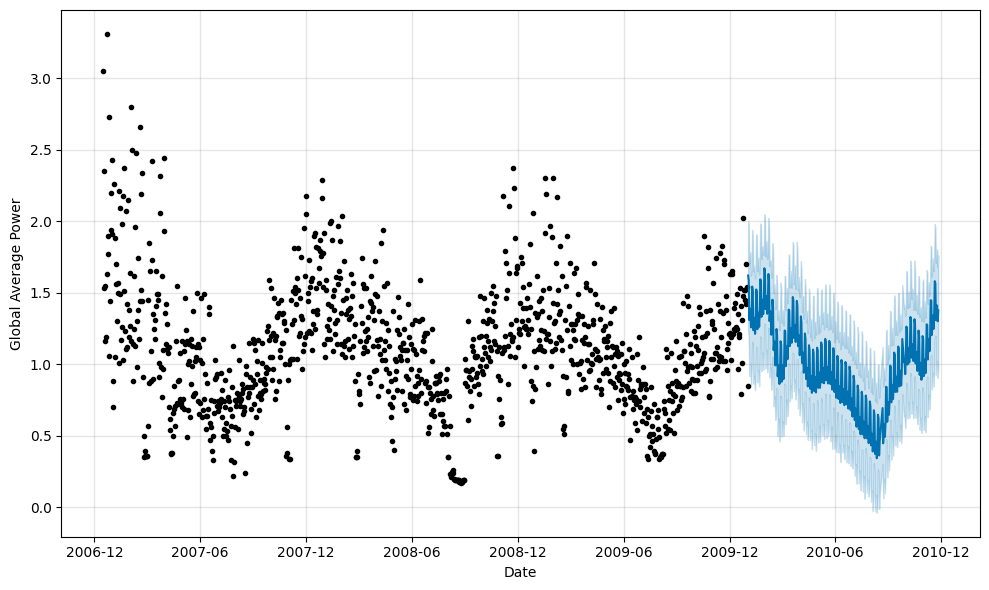

In [25]:
m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Global Average Power')
plt.show()

In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-02,1.054113,1.232721,2.001449,1.054113,1.054113,0.566558,0.566558,0.566558,0.177569,0.177569,0.177569,0.388989,0.388989,0.388989,0.0,0.0,0.0,1.620671
1,2010-01-03,1.054058,1.197418,1.972052,1.054058,1.054058,0.530384,0.530384,0.530384,0.151966,0.151966,0.151966,0.378418,0.378418,0.378418,0.0,0.0,0.0,1.584441
2,2010-01-04,1.054003,0.918213,1.707832,1.054003,1.054003,0.254706,0.254706,0.254706,-0.112460,-0.112460,-0.112460,0.367166,0.367166,0.367166,0.0,0.0,0.0,1.308709
3,2010-01-05,1.053948,0.997681,1.754245,1.053948,1.053948,0.335588,0.335588,0.335588,-0.019965,-0.019965,-0.019965,0.355553,0.355553,0.355553,0.0,0.0,0.0,1.389536
4,2010-01-06,1.053893,0.996697,1.782501,1.053893,1.053893,0.326493,0.326493,0.326493,-0.017420,-0.017420,-0.017420,0.343914,0.343914,0.343914,0.0,0.0,0.0,1.380387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2010-11-22,1.036329,0.922648,1.708789,0.995177,1.082358,0.272248,0.272248,0.272248,-0.112460,-0.112460,-0.112460,0.384708,0.384708,0.384708,0.0,0.0,0.0,1.308577
318,2010-11-23,1.036274,1.021406,1.783537,0.994982,1.082324,0.369840,0.369840,0.369840,-0.019965,-0.019965,-0.019965,0.389805,0.389805,0.389805,0.0,0.0,0.0,1.406114
319,2010-11-24,1.036220,0.984259,1.804027,0.994733,1.082572,0.375043,0.375043,0.375043,-0.017420,-0.017420,-0.017420,0.392463,0.392463,0.392463,0.0,0.0,0.0,1.411262
320,2010-11-25,1.036165,0.905333,1.678583,0.994458,1.082821,0.264359,0.264359,0.264359,-0.128475,-0.128475,-0.128475,0.392834,0.392834,0.392834,0.0,0.0,0.0,1.300524


In [27]:
df_results = test_plot.merge(forecast, on="ds", how="left")[["ds","y","yhat"]]
df_results = df_results.melt(id_vars="ds")
df_results["variable"] = df_results["variable"].map({"y":"true values", "yhat":"predicted values"})
df_results.columns = ["Date", "Variable", "Global Active Power"]

In [28]:
import plotly.express as px

# Create the first line plot
fig = px.line(df_results, x="Date", y="Global Active Power", color="Variable", 
              color_discrete_sequence=["black", "red"], line_dash = 'Variable')

# fig.update_traces(line=dict(dash=['solid', 'dash']), 
#                   name=['Line 1', 'Line 2'])

fig.update_layout(
    title='True vs Predicted Values',
    xaxis_title='Date',
    yaxis_title='Global Active Power',
    #legend=dict(title='Lines'),
    width=1200,  # Set the width of the figure
    height=600  # Set the height of the figure
)


# Show the plot
fig.show()

# df = px.data.gapminder().query("continent == 'Oceania'")
# fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
# fig.show()

In [29]:
from sklearn.metrics import root_mean_squared_error
y_true = test_plot["y"]
y_pred = forecast["yhat"]

root_mean_squared_error(y_true, y_pred)

0.2632010945496168

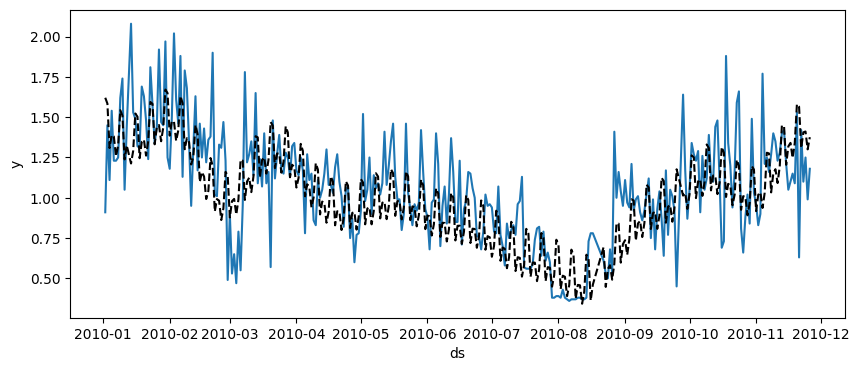

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(data=test_plot, x="ds", y="y") # true (in blue)
sns.lineplot(data=forecast, x="ds", y="yhat", color="black", linestyle='--') # predicted (in black)
plt.show()

<Axes: >

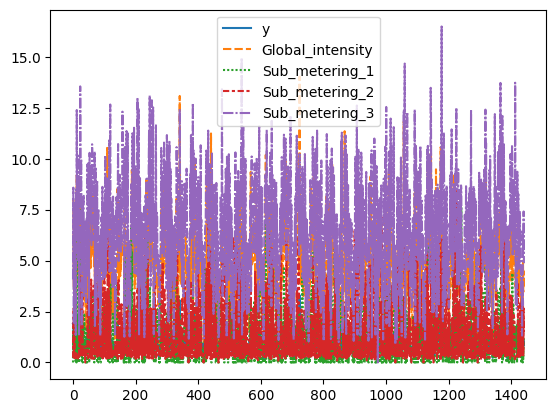

In [31]:
sns.lineplot(data=data_clean)

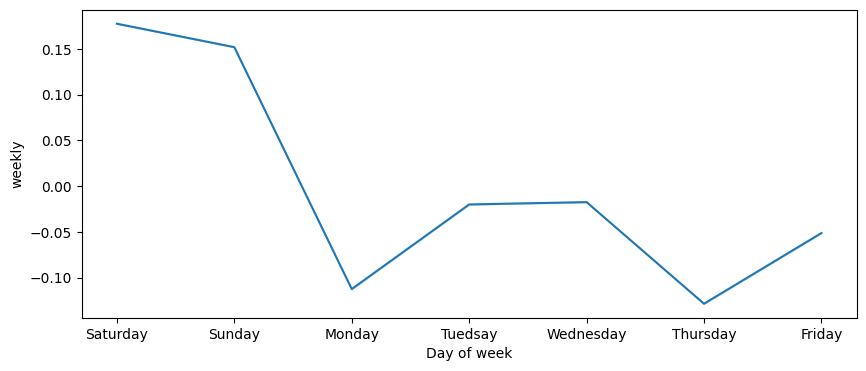

In [32]:
days_week = dict(zip(np.arange(1,8),["Monday", "Tuedsay", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]))
forecast_weekly = forecast.copy()
forecast_weekly["dayweek"] = forecast_weekly["ds"].apply(lambda x: x.isoweekday()).map(days_week)

plt.figure(figsize=(10,4))
df_weekly = forecast_weekly[["weekly","dayweek"]]
sns.lineplot(data=df_weekly, x="dayweek", y="weekly")
plt.xlabel("Day of week")
plt.show()

In [33]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

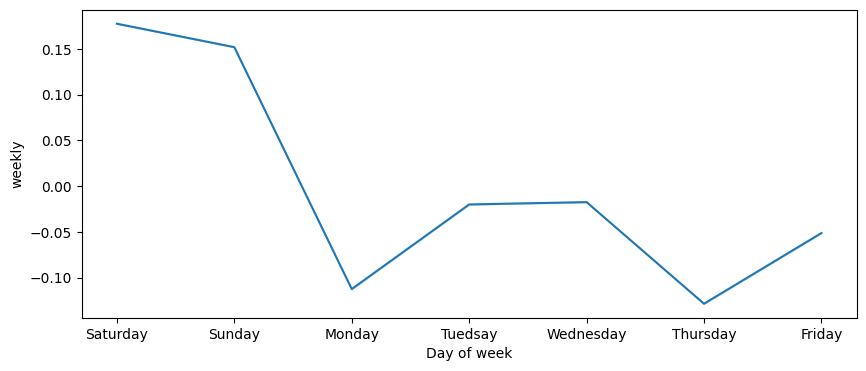

In [34]:
plt.figure(figsize=(10,4))
df_weekly = forecast_weekly[["weekly","dayweek"]]
sns.lineplot(data=df_weekly, x="dayweek", y="weekly")
plt.xlabel("Day of week")
plt.show()

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\LaurèneDAVID\Documents\Teaching\HEC_EMBA\app_hec_emba\venv\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

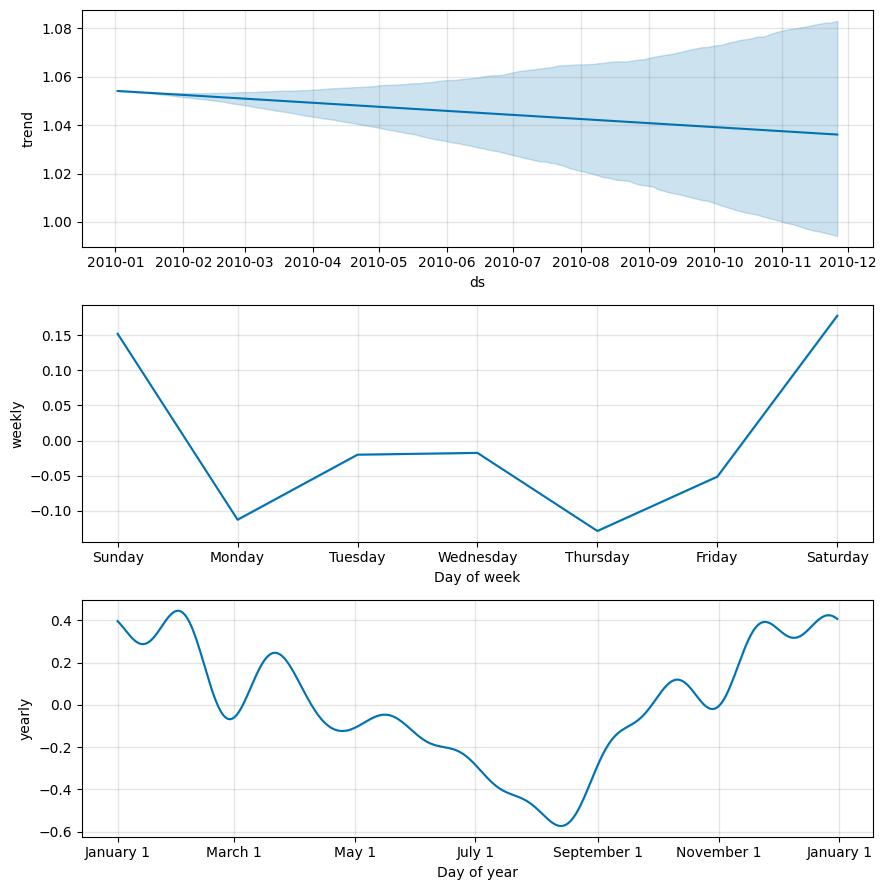

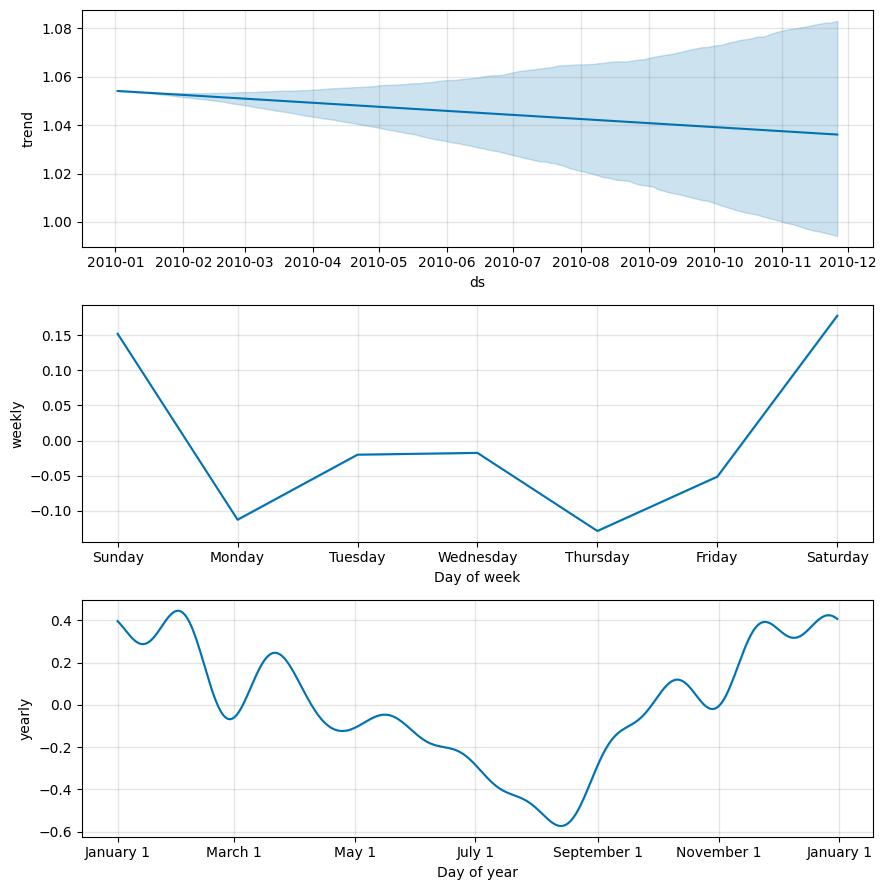

In [35]:
m.plot_components(forecast)

In [57]:
forecast_year = forecast[["ds","yearly"]].copy()
forecast_year["ds_year"] = forecast_year["ds"].apply(lambda x: x.strftime("%B %d"))
forecast_year["ds"] = forecast_year["ds"].apply(lambda x: x.strftime("%m-%d"))
forecast_year.sort_values(by=["ds"], inplace=True)

In [63]:
forecast_year = forecast_year.groupby(["ds","ds_year"]).mean().reset_index()
px.area(forecast_year, x="ds_year", y="yearly")